# Module 1.1a - introduction
## gas properties
This module is similar to the introduction tutorial from Cantera: 

https://cantera.org/tutorials/python-tutorial.html

We start by loading the important libraries from cantera and matplotlib

In [49]:
%matplotlib inline
import cantera as ct
import matplotlib.pyplot as plt
import numpy as np

We will create a gas mixture from an input file containing detailed chemical reactions for methane and air, the GRI 3.0 mechanism: http://combustion.berkeley.edu/gri-mech/version30/text30.html

In [20]:
gas = ct.Solution('gri30.cti')

Display the properties of the gas by simply calling the variable 

In [2]:
gas

Use parentheses (round brackets):

In [21]:
gas()


  gri30:

       temperature             300  K
          pressure          101325  Pa
           density       0.0818891  kg/m^3
  mean mol. weight         2.01588  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy           26470        5.336e+04     J
   internal energy     -1.2109e+06       -2.441e+06     J
           entropy           64914        1.309e+05     J/K
    Gibbs function     -1.9448e+07        -3.92e+07     J
 heat capacity c_p           14312        2.885e+04     J/K
 heat capacity c_v           10187        2.054e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                H2              1                1         -15.7173
     [  +52 minor]              0                0



If you want to know more about the object, use help(object). This information is also online in the documentation,
https://cantera.org/documentation/docs-2.4/sphinx/html/cython/importing.html

In [22]:
help(gas)

Help on Solution in module cantera.composite object:

class Solution(cantera._cantera.ThermoPhase, cantera._cantera.Kinetics, cantera._cantera.Transport)
 |  A class for chemically-reacting solutions. Instances can be created to
 |  represent any type of solution -- a mixture of gases, a liquid solution, or
 |  a solid solution, for example.
 |  
 |  Class `Solution` derives from classes `ThermoPhase`, `Kinetics`, and
 |  `Transport`.  It defines no methods of its own, and is provided so that a
 |  single object can be used to compute thermodynamic, kinetic, and transport
 |  properties of a solution.
 |  
 |  To skip initialization of the Transport object, pass the keyword argument
 |  ``transport_model=None`` to the `Solution` constructor.
 |  
 |  The most common way to instantiate `Solution` objects is by using a phase
 |  definition, species and reactions defined in an input file::
 |  
 |      gas = ct.Solution('gri30.cti')
 |  
 |  If an input file defines multiple phases, the p

The content of the python objects can be shown using dir()

In [23]:
dir(gas)

['DP',
 'DPX',
 'DPY',
 'HP',
 'HPX',
 'HPY',
 'ID',
 'P',
 'P_sat',
 'SP',
 'SPX',
 'SPY',
 'SV',
 'SVX',
 'SVY',
 'T',
 'TD',
 'TDX',
 'TDY',
 'TP',
 'TPX',
 'TPY',
 'T_sat',
 'UV',
 'UVX',
 'UVY',
 'X',
 'Y',
 '__call__',
 '__class__',
 '__copy__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pyx_vtable__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '_check_kinetics_species_index',
 '_check_phase_index',
 '_check_reaction_index',
 '_full_states',
 '_init_cti_xml',
 '_init_parts',
 '_references',
 'activities',
 'activity_coefficients',
 'add_reaction',
 'add_species',
 'atomic_weight',
 'atomic_weights',
 'basis',
 'binary_diff_coeffs',
 'chemical_potentials',
 'concentrations',
 'cp',
 'cp_mass',
 'cp_mole',
 'cr

Let's display density:

In [25]:
gas.density

0.08188905810274845

That's quite low, and if you look at the initial composition of the gas, you will see why. Check what is contained in the variables to get an impression. Let's now display the viscosity:

In [26]:
gas.viscosity

CanteraError: 
***********************************************************************
NotImplementedError thrown by Transport::viscosity:
Not implemented.
***********************************************************************


We cannot get the viscosity because we need to set a mixture and we need a model for the computation of mixture properties. Several models are available, from more accurate (and more expensive) to less accurate: **multi**, **mix**, **UnityLewis**
It is important to know which models are used because each model has it's own limitations and range of applicability.

How models and submodels are related for the transport class can be viewed here: 
https://cantera.org/documentation/docs-2.4/doxygen/html/d2/dfb/classCantera_1_1Transport.html

- **Multi** multicomponent diffusion model https://www.cantera.org/documentation/docs-2.1/doxygen/html/classCantera_1_1MultiTransport.html
- **Mix** mixture averaged model https://cantera.org/documentation/docs-2.4/doxygen/html/d9/d17/classCantera_1_1MixTransport.html
- **UnityLewis** unity lewis number https://cantera.org/documentation/docs-2.4/doxygen/html/d3/dd6/classCantera_1_1UnityLewisTransport.html

In [135]:
gas.transport_model = 'UnityLewis'
# Set TPX, the Temperature, the pressure and the mole fraction. 
# The mole fraction will be normalized, so the sum of your input values will be 1.0
gas.TPX = 298, 101325, 'CH4:1, O2:2'

We have set a mixing model, so Cantera can compute the mixture averaged properties like viscosity:

In [132]:
gas.viscosity

1.9167679942051174e-05

In [133]:
gas.X

array([0.        , 0.        , 0.        , 0.83333333, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.16666667, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

Let's put density, thermal conductivity and heat capacity into the variables *rho*, *$\lambda$* and *cp*. Note that the thermal conductivity is called lambda ($\lambda$) in several text books, but lambda is a python command for an anonymous function:
https://www.programiz.com/python-programming/anonymous-function

This is why we will use *Lambda* with a capital *L*.

In [130]:
rho = gas.density
Lambda = gas.thermal_conductivity
cp = gas.cp_mass

We have the diffusion coefficients of each of the species available (why not a single value like viscosity?):

In [134]:
D = gas.mix_diff_coeffs_mass
print(D)

[2.23240967e-05 2.23240967e-05 2.23240967e-05 2.23240967e-05
 2.23240967e-05 2.23240967e-05 2.23240967e-05 2.23240967e-05
 2.23240967e-05 2.23240967e-05 2.23240967e-05 2.23240967e-05
 2.23240967e-05 2.23240967e-05 2.23240967e-05 2.23240967e-05
 2.23240967e-05 2.23240967e-05 2.23240967e-05 2.23240967e-05
 2.23240967e-05 2.23240967e-05 2.23240967e-05 2.23240967e-05
 2.23240967e-05 2.23240967e-05 2.23240967e-05 2.23240967e-05
 2.23240967e-05 2.23240967e-05 2.23240967e-05 2.23240967e-05
 2.23240967e-05 2.23240967e-05 2.23240967e-05 2.23240967e-05
 2.23240967e-05 2.23240967e-05 2.23240967e-05 2.23240967e-05
 2.23240967e-05 2.23240967e-05 2.23240967e-05 2.23240967e-05
 2.23240967e-05 2.23240967e-05 2.23240967e-05 2.23240967e-05
 2.23240967e-05 2.23240967e-05 2.23240967e-05 2.23240967e-05
 2.23240967e-05]


The unity lewis number assumption means that $\frac{\lambda}{c_p} = \rho\cdot D$

In [34]:
print(k/cp, rho*D[0])

2.4735970056741385e-05 2.4735970056741385e-05


So, what happens when we use a more advanced diffusion model? Let's try the mixture averaged model:

In [136]:
gas.transport_model = 'Mix'
# Set TPX, the Temperature, the pressure and the mole fraction. 
# The mole fraction will be normalized, so the sum of your input values will be 1.0
gas.TPX = 298, 101325, 'CH4:1, O2:2'

In [137]:
rho = gas.density
Lambda = gas.thermal_conductivity
cp = gas.cp_mass

In [138]:
D = gas.mix_diff_coeffs_mass
print(D)

[7.73535892e-05 1.19916599e-04 3.27115198e-05 2.22628231e-05
 3.21126563e-05 2.24209250e-05 2.09584753e-05 2.08213077e-05
 3.08051928e-05 3.49243118e-05 2.29924213e-05 2.29924213e-05
 2.24921991e-05 2.22628231e-05 2.09012879e-05 1.58734751e-05
 1.56725913e-05 1.55483825e-05 1.54457481e-05 1.54457481e-05
 1.52638384e-05 1.68765904e-05 1.67103063e-05 1.65548133e-05
 1.60698840e-05 1.49276238e-05 1.48094194e-05 2.55581437e-05
 1.34481335e-05 1.34481335e-05 2.92841201e-05 3.44453924e-05
 3.37597727e-05 2.18284375e-05 2.07591008e-05 2.07546070e-05
 1.75494101e-05 1.57149224e-05 2.08150797e-05 2.08383135e-05
 1.52905450e-05 1.51559867e-05 2.55577709e-05 1.57820489e-05
 1.57820489e-05 1.57820489e-05 1.58534493e-05 2.10933761e-05
 2.01664110e-05 1.15067976e-05 1.14569576e-05 1.33876549e-05
 1.33296601e-05]


In [43]:
Le = Lambda/(rho*cp*D)
print(Le)

[0.29308562 0.18905827 0.69306546 1.01834454 0.70599032 1.01116366
 1.08172108 1.08884729 0.73595464 0.64915308 0.98603032 0.98603032
 1.00795944 1.01834454 1.08468074 1.42824582 1.4465524  1.45810823
 1.46779712 1.46779712 1.48528986 1.34335337 1.35672106 1.36946422
 1.41078956 1.51874303 1.53086518 0.88704504 1.68582685 1.68582685
 0.77418152 0.65817873 0.67154553 1.03860959 1.09211014 1.0923466
 1.29185109 1.44265584 1.08917308 1.0879587  1.48269564 1.49585935
 0.88705797 1.43651973 1.43651973 1.43651973 1.43004996 1.07480303
 1.1242072  1.97024622 1.97881717 1.69344255 1.70081039]


So as we can see, the assumptions of $Le=1$ does not hold for all species.

In [61]:
print("index of largest Lewis number is ",Le.argmax())
print("value of largest Lewis number is ",Le.max()) 
print("species with largest Lewis number is ",gas.species_names[Le.argmax()])

index of largest Lewis number is  50
value of largest Lewis number is  1.9788171711373093
species with largest Lewis number is  C3H8


Let's see how large the difference in Lewis number is for several different species

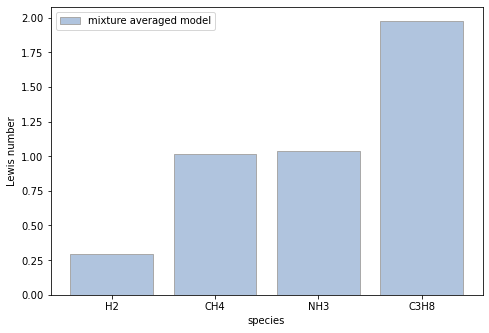

In [125]:
import matplotlib.pyplot as plt
Species=['H2','CH4','NH3','C3H8']
# list comprehension: returns the list [expression for item in list]
Le_mix = [Le[gas.species_index(le)] for le in Species]

# let's globally set the size of figures in inches
plt.rcParams["figure.figsize"] = (6,4)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xlabel('species')
plt.ylabel('Lewis number')
labelList=["mixture averaged model"]
ax.bar(Species,Le_mix,color='lightsteelblue',edgecolor='darkgrey')
plt.legend(labelList)
plt.show()

In [115]:
# save the figure
plt.savefig('bargraph_lewisnumber_mixingmodels.png')

<Figure size 432x288 with 0 Axes>

We can also plot the gas properties as a function of temperature. 

In [88]:
gas()


  gri30:

       temperature             298  K
          pressure          101325  Pa
           density         1.09107  kg/m^3
  mean mol. weight         26.6801  amu

                          1 kg            1 kmol
                       -----------      ------------
          enthalpy      -9.322e+05       -2.487e+07     J
   internal energy     -1.0251e+06       -2.735e+07     J
           entropy          7652.3        2.042e+05     J/K
    Gibbs function     -3.2126e+06       -8.571e+07     J
 heat capacity c_p          1179.9        3.148e+04     J/K
 heat capacity c_v          868.27        2.317e+04     J/K

                           X                 Y          Chem. Pot. / RT
                     -------------     ------------     ------------
                O2       0.666667         0.799567         -25.0791
               CH4       0.333333         0.200433         -53.6221
     [  +51 minor]              0                0



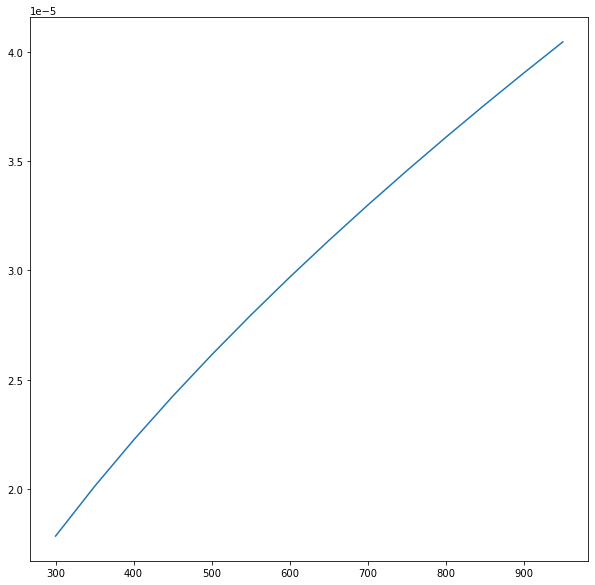

In [128]:
# define empty list of viscosities. Note that viscosity is now a local variable 
# (local to this python notebook cell)
viscosity=[]
temperature = np.arange(300,1000,50)
for T in temperature:
    gas.TP=T,101325
    viscosity.append(gas.viscosity) 
# create a figure with a size different than the global settings
plt.figure(figsize=(10,10))    
# let's make an ugly plot (not fit for the king!)
plt.plot(temperature,viscosity)
# second line in the same plot
#plt.plot(temperature,viscosity2)
plt.show()

# Assignment:
- Note: Graphs should always be completely self-explanatory, with clear axis labels, legends, and a title. Texts and any other details should be such that if you give your Nobel laureate lecture, the king of Sweden should be able to clearly see and appreciate your graph all the way from the back of the Stockholm Concert Hall. Make your graph fit for the king.
- Set the mixture to the stoichiometric mixture of methane and pure air.
- Plot the Lewis numbers of [H2,CH4,NH3,C3H8] for the Unity Lewis model, the Mixture Averaged, and the Multicomponent Diffusion model in one bar graph 
- Change the mixture to an equivalence ratio 0.5 and show in a bar graph for the Lewis numbers the difference between equivalence ratio 0.5 and a stoichiometric mixture. Use the mixture averaged diffusion model.
- Make a plot of the viscosity, heat capacity, diffusion and the Lewis number of [H2, CH4, NH3, C3H8] (plot all species in the same figure) as function of temperature. Use equivalence ratio $\phi=0.5$ and stoichiometric. You will now have 8 lines in a single graph! Plot it in such a way that it is still understandable.  